# Benchmarking Binary Classifiers Lab

## Intro and objectives


### In this lab you will learn:
1. How to benchmark binary clasifiers 

### What I hope you'll get out of this lab
* Worked Examples
* How to interpret the results obtained

In [42]:
import sys

assert sys.version_info >= (3, 7)


In [43]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [44]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### In this lab we will train two different binary classifier capable of processing images of written numbers and detecting those images with the number 5.  
### We will evaluate the performace of each candidate to determine which one is the most adequate for the task.


## Let's import the MNIST data

In [45]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [46]:
# extra code – it's a bit too long
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [47]:
mnist.keys()  # extra code – we only use data and target in this notebook

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [48]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
X.shape

(70000, 784)

In [50]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [51]:
y.shape

(70000,)

In [52]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

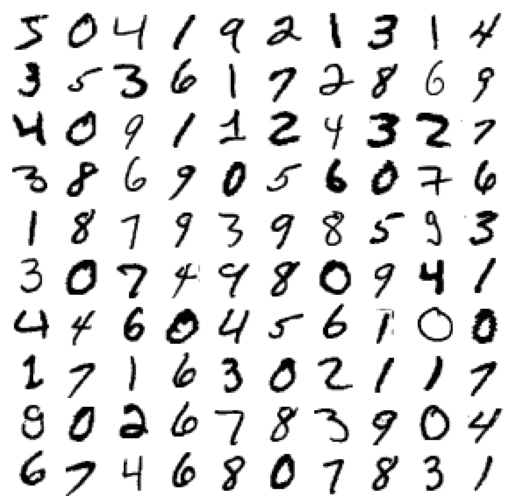

In [53]:
import matplotlib.pyplot as plt


plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

### We split the dataset in two: train and test

In [54]:
# split data into training and test data, for both features and target
# The split is based on a random number generator. 
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y)

In [55]:
train_X.shape

(52500, 784)

In [56]:
train_y.shape

(52500,)



### As we are interested in a binary classification (Yes/No) we need to recode our response variable to take the value `True` if it refers to a 5-digit and `False` otherwise.

In [57]:
train_y_5 = (train_y == '5')  # True for all 5s, False for all other digits
test_y_5 = (test_y == '5')

In [58]:
train_y_5

array([False, False, False, ..., False, False, False])

In [59]:
test_y_5

array([False, False, False, ..., False, False, False])

## Let's train a SDG-based classifier

In [60]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_X, train_y_5)

SGDClassifier(random_state=42)

## Let's train a Random Forest-based classifier


In [61]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

forest_clf.fit(train_X, train_y_5)

RandomForestClassifier(random_state=42)

## Let's evaluate the performance of each classifier

### Confusion Matrix for the SGD-based classifier

In [62]:
from sklearn.model_selection import cross_val_predict

test_y_pred_sgd = sgd_clf.predict(test_X)

In [63]:
from sklearn.metrics import confusion_matrix

cm_sgd = confusion_matrix(test_y_5, test_y_pred_sgd)
cm_sgd

array([[15455,   485],
       [  268,  1292]])

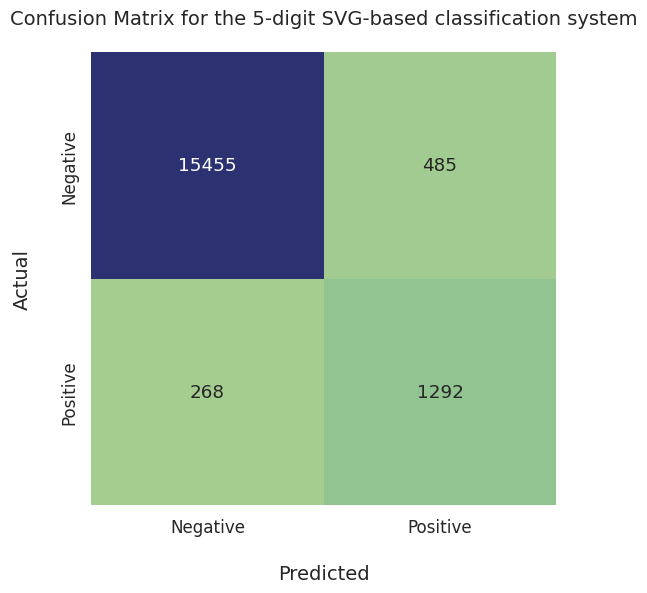

In [64]:
import seaborn as sns

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(6,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format   
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers. 
ax = sns.heatmap(cm_sgd, annot=True, fmt='d',cbar=False,cmap="crest" )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax.set_title("Confusion Matrix for the 5-digit SVG-based classification system", fontsize=14, pad=20)

plt.show()

### Confusion Matrix for the Random Forest-based classifier

In [65]:
test_y_pred_forest = forest_clf.predict(test_X)



In [66]:
cm_forest = confusion_matrix(test_y_5, test_y_pred_forest)
cm_forest

array([[15929,    11],
       [  193,  1367]])

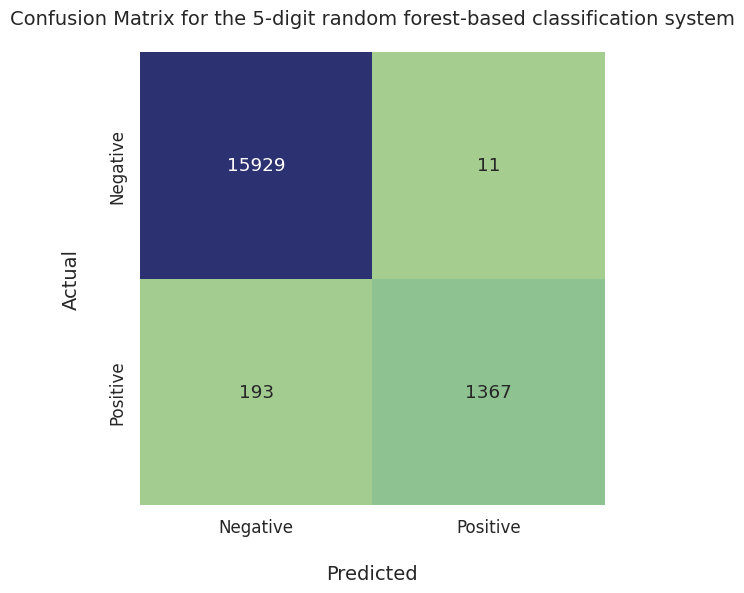

In [67]:
# Change figure size and increase dpi for better resolution
plt.figure(figsize=(6,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format   
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers. 
ax = sns.heatmap(cm_forest, annot=True, fmt='d',cbar=False,cmap="crest" )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax.set_title("Confusion Matrix for the 5-digit random forest-based classification system", fontsize=14, pad=20)

plt.show()

### From the previous two confusion matrices we conclude that the random forest-based classifier performs better than the SVG-based one.

### This is the case as the number of misclassifications (values outside the diagonal) is lower in the case of the random forest-based classifier.

### F1 score for the SGD-based classifier

In [68]:
from sklearn.metrics import f1_score
f1_score(test_y_5, test_y_pred_sgd) 

0.7743482169613425

### F1 score for the Random Forest-based classifier

In [69]:
f1_score(test_y_5, test_y_pred_forest) 

0.9305650102110279

### ROC curve for both classifiers

In [70]:
from sklearn.metrics import roc_curve

fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(test_y_5, test_y_pred_sgd)

fpr_forest, tpr_forest, thresholds_forest = roc_curve(test_y_5, test_y_pred_forest)

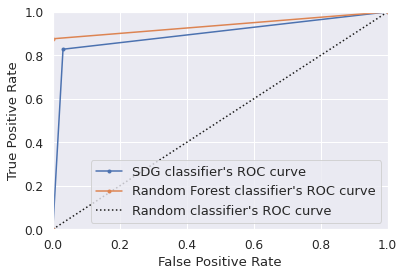

In [71]:



#create ROC curve
plt.plot(fpr_sgd,tpr_sgd, marker='.',label="SDG classifier's ROC curve")

plt.plot(fpr_forest,tpr_forest, marker='.',label="Random Forest classifier's ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()

### From the previous figurewe conclude that the random forest-based classifier performs better than the SVG-based one.

### This is the case as ROC curve for the Random Forest lies closer to the ideal one (located at the upper lefthand corner).